# Index


1) Data Cleaning

    1.1) Data Type Evaluation 
        1.1.1) Missing Values
        1.1.2) Data Format
    1.2) Data Consistency


2) Descriptive Analysis

3) Regression Analysis

    3.1 Linear Regression
    3.2 Logistic Regression



## 1. Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('max_colwidth', 500)

############################  1) DATA CLEANING ############################

# save the csv in a dataframe and separate it with semicolon
df = pd.read_csv("AS24 Data Analyst IAM Case Study data 2019 10.csv",sep=";")

#we do the same for the column description csv
descriptionDf = pd.read_csv("AS24 Data Analyst IAM Case Study data descrip 2019 10.csv", sep=";")

display(descriptionDf)


column name  \
0                article_id   
1              product_tier   
2                 make_name   
3                     price   
4           first_zip_digit   
5   first_registration_year   
6              created_date   
7              deleted_date   
8              search_views   
9              detail_views   
10               stock_days   
11                      ctr   

                                                                         description  
0                                                          unique article identifier  
1                                                      premium status of the article  
2                                                       name of the car manufacturer  
3                                                               price of the article  
4                first digit of the zip code of the region the article is offered in  
5                                      year of the first registration of the article  
6                                                       creation date of the listing  
7                                                       deletion date of the listing  
8                      number of times the article has been shown as a search result  
9                                    number of times the article has been clicked on  
10  Time in days between the creation of the listing and the deletion of the listing  
11   Click through rate calculated as the quotient of detail_views over search_views

# 1.1 Data Type Evaluation
  ## 1.1.1 Missing Values

In [3]:
# Check how many NA/null values do we have per column
if df.isnull().values.any():
    print(df.isnull().sum())

# display the null values to have an idea of how does the missing data look like

df_with_nan = df[(df["search_views"].isnull()) | (df["detail_views"].isnull()) | (df["ctr"].isnull()) ]

display(df_with_nan.head())

print("\n Proportion of rows with nan values "+str("{:.5g}".format(round(len(df_with_nan)/len(df),4)*100))+"%")

article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64


article_id product_tier      make_name  price  first_zip_digit  \
6738    355684985        Basic          Volvo   5950                8   
10151   363161664        Basic        Renault   4950                3   
19983   360460901        Basic  Mercedes-Benz    105                7   
21423   358837372        Basic     Volkswagen   2999                5   
26122   360460897        Basic  Mercedes-Benz  22445                7   

       first_registration_year created_date deleted_date  search_views  \
6738                      2009     28.08.18     28.08.18           0.0   
10151                     2011     12.11.18     01.03.19           NaN   
19983                     2004     12.10.18     12.10.18           0.0   
21423                     2003     24.09.18     24.09.18           NaN   
26122                     2011     12.10.18     12.10.18           0.0   

       detail_views  stock_days  ctr  
6738            0.0           0  NaN  
10151           NaN         109  NaN  
19983           0.0          -1  NaN  
21423           NaN           0  NaN  
26122           0.0           0  NaN


 Proportion of rows with nan values 0.03%


The proportion of NaNs is very small. An easy solution would be to simply drop those rows where the value contains a NaN.
However, let's analyse if we can actually find a reason of why we are missing a value for those rows.

We are not missing the listing fixed data which comes from the listing. But we are missing variable data such as search views. It could be a tracking, calculation or format issue

The first thing to notice by simply looking at the data is that CTR is NaN when search_views and detail_views = 0, or when they are as well NaN

In order to confirm this hypothesis, let's filter the dataframe with those 2 conditions

In [4]:
df_no_views = df[(df["detail_views"]==0) & (df["search_views"]==0) ]

print("\nData where both view data = 0 .")
display(df_no_views) 


Data where both view data = 0 .


article_id product_tier      make_name  price  first_zip_digit  \
6738    355684985        Basic          Volvo   5950                8   
19983   360460901        Basic  Mercedes-Benz    105                7   
26122   360460897        Basic  Mercedes-Benz  22445                7   
28823   360460890        Basic  Mercedes-Benz  26445                7   
38923   360471136        Basic           Audi   1500                2   
43222   360493605        Basic  Mercedes-Benz  37500                3   
52291   360460896        Basic  Mercedes-Benz   1194                7   
68584   360460887        Basic           Opel  16445                7   
69176   360460879        Basic  Mercedes-Benz  30445                7   
70772   364670935        Basic  Mercedes-Benz   2150                3   
71083   363908548        Basic        Renault  14500                7   
71854   363925615        Basic           Fiat   3795                5   
72620   359233783        Basic           Audi   1039                4   
78057   360460880        Basic  Mercedes-Benz    994                7   

       first_registration_year created_date deleted_date  search_views  \
6738                      2009     28.08.18     28.08.18           0.0   
19983                     2004     12.10.18     12.10.18           0.0   
26122                     2011     12.10.18     12.10.18           0.0   
28823                     2011     12.10.18     12.10.18           0.0   
38923                     2012     12.10.18     12.10.18           0.0   
43222                     2002     12.10.18     12.10.18           0.0   
52291                     2018     12.10.18     12.10.18           0.0   
68584                     2009     12.10.18     12.10.18           0.0   
69176                     2014     12.10.18     12.10.18           0.0   
70772                     2002     28.11.18     29.11.18           0.0   
71083                     2015     20.11.18     20.11.18           0.0   
71854                     2011     20.11.18     21.11.18           0.0   
72620                     2016     28.09.18     28.09.18           0.0   
78057                     2014     12.10.18     12.10.18           0.0   

       detail_views  stock_days  ctr  
6738            0.0           0  NaN  
19983           0.0          -1  NaN  
26122           0.0           0  NaN  
28823           0.0           0  NaN  
38923           0.0           0  NaN  
43222           0.0           0  NaN  
52291           0.0           0  NaN  
68584           0.0           0  NaN  
69176           0.0           0  NaN  
70772           0.0           1  NaN  
71083           0.0           0  NaN  
71854           0.0           2  NaN  
72620           0.0           0  NaN  
78057           0.0           0  NaN

In this particular case, since we don't have loads of NaNs we can simply look at the table to see that when search and detail views are 0, ctr is always NaN, which would imply a calcualation issue. But if we had a bigger amount of data we could not reach to this conclusion that easily.
We could take the following approach: To have a look of the proportion of rows where search & details views are both 0 and ctr is NaN

In [5]:
print("\nWhat is the proportion of rows that have search and detail = 0 and ctr is NaN? "+ "\n"+ str("{:.5g}".format(len(df_no_views) / len(df_no_views[df_no_views["ctr"].isnull()])*100))+"%")

         


What is the proportion of rows that have search and detail = 0 and ctr is NaN? 
100%


Indeed, seems like all rows where search_views and detail_views are both 0, CTR is NaN

This looks like a calculation issue.

We could either get rid of the data, or replace those NaNs by 0. But before let's check the rest of the NaNs values.

We need to check as well if there is any row where search_view is NaN and detail_view is not and viceversa.



In [6]:
df_views_are_NaN = df[(df["detail_views"].isnull()) | (df["search_views"].isnull())] 
df_views_are_both_NaN = df[(df["detail_views"].isnull()) & (df["search_views"].isnull())] 

print("\nWhat is the proportion of rows that have search or detail views = 0 compared to when they are both Nan ? "+ "\n"+ str("{:.5g}".format(len(df_views_are_both_NaN)/ len(df_views_are_NaN)*100))+"%")  

print("\nWhat is the proportion of rows that have search or detail views = NaN an ctr is NaN? "+ "\n"+ str("{:.5g}".format(len(df_views_are_NaN) / len(df_views_are_NaN[df_views_are_NaN["ctr"].isnull()])*100))+"%")


What is the proportion of rows that have search or detail views = 0 compared to when they are both Nan ? 
100%

What is the proportion of rows that have search or detail views = NaN an ctr is NaN? 
100%


All rows where search_views or detail_views are NaN, ctr is as well NaN. This supports the hypothesis that those NaNs could indeed be a value of 0, and that the reason of why ctr = NaN is due to dividing 0/0

To confirm the hypothesis that we have a calculation issue, the following expression needs to be true:
All rows where ctr= NaN need to have either search & views = 0, or = NaN

In [7]:
df_ctr_is_nan = df[ (df["ctr"].isnull()) ]

print("\nWhat is the proportion of rows that have search or detail views = NaN  or = 0? "+ "\n"+ str("{:.5g}".format(len(df_ctr_is_nan[((df_ctr_is_nan["search_views"]==0) & (df_ctr_is_nan["detail_views"]==0)) |((df_ctr_is_nan["search_views"].isnull()) & (df_ctr_is_nan["detail_views"].isnull() ))  ])/ len(df_ctr_is_nan)*100))+"%")



What is the proportion of rows that have search or detail views = NaN  or = 0? 
100%


We can confirm that we might have a calculation issue. 

There are of course other ways to tackle the missing value problems such as identifying if there is a relationship between NaNs and other columns such as first_registration_year or the dates. But since this project is not focused on missing data analysis we will move on by replacing the Nans with 0.

In [8]:
df = df.fillna(0)

  ## 1.1.2 Data Format

In [9]:
# Data Type per column
df.dtypes

article_id                   int64
product_tier                object
make_name                   object
price                        int64
first_zip_digit              int64
first_registration_year      int64
created_date                object
deleted_date                object
search_views               float64
detail_views               float64
stock_days                   int64
ctr                         object
dtype: object

Let's first check if it makes sense the data format of each column.

Does it make sense that the column "ctr" is an object ? Which will be probably a string ? We might do calculations with this column so we could cast it to a float. But we are not sure if all values are correctly set.

Since the column description dataframe specifies that ctr = detail_views / search_views, we can simply recalculate the ctr column. If the values are different, it means as well that the ctr values from before were wrong, or is just a decimal topic.

In [10]:
df["ctr"] = df["detail_views"]/ df["search_views"]
df = df.fillna(0)

Let's quickly check the results

In [11]:
df["ctr"].describe()

count    78321.000000
mean         0.046878
std          0.038821
min          0.000000
25%          0.024251
50%          0.038224
75%          0.058673
max          1.833333
Name: ctr, dtype: float64

A max of 1.8 does not look very acceptable, but we could assume the user clicked multiple times on the same article and as well number of search_views is very small

In [12]:
df["search_views"].describe()

count     78321.000000
mean       2297.209178
std        6338.682878
min           0.000000
25%         367.000000
50%         920.000000
75%        2233.000000
max      608754.000000
Name: search_views, dtype: float64

Indeed, 12 and 15 search_views is a very reduced number since the mean of search_views is 2297. Se we will leave those values there

Cast the string dates to datetime format

In [13]:
df.created_date = pd.to_datetime(df.created_date)

df.deleted_date = pd.to_datetime(df.deleted_date)

# 1.2 Data Consistency

Let's have a look at the numbers. 
Do we have duplicate rows ?

In [14]:
if df[df.duplicated()].empty:
    print("\nNo duplicates found")
else:
    print("\nThe dataset cotains duplicate rows")



No duplicates found


What about duplicated article_ids ?


In [15]:
duplicated_article_ids = df[df.article_id.duplicated()].sort_values(by="article_id")

print(duplicated_article_ids.shape)

(16, 12)


Since there are only 16 duplicate article_ids we will just drop them for simplicity.

In [16]:
df = df.drop_duplicates(subset="article_id", keep= False)

df.describe()

article_id          price  first_zip_digit  first_registration_year  \
count  7.828900e+04   78289.000000     78289.000000             78289.000000   
mean   3.574866e+08   15070.517723         4.631174              2011.090626   
std    5.076957e+06   16376.688665         2.354192                 6.538903   
min    3.472324e+08       1.000000         1.000000              1924.000000   
25%    3.536387e+08    5750.000000         3.000000              2008.000000   
50%    3.585479e+08   10911.000000         5.000000              2013.000000   
75%    3.614817e+08   18893.000000         7.000000              2015.000000   
max    3.647040e+08  249888.000000         9.000000              2106.000000   

        search_views  detail_views    stock_days           ctr  
count   78289.000000  78289.000000  78289.000000  78289.000000  
mean     2284.466566     93.129686     35.974837      0.046882  
std      6238.752674    226.168620     32.210449      0.038827  
min         0.000000      0.000000     -3.000000      0.000000  
25%       367.000000     13.000000     10.000000      0.024249  
50%       919.000000     36.000000     25.000000      0.038229  
75%      2231.000000     94.000000     55.000000      0.058682  
max    608754.000000  13926.000000    127.000000      1.833333

Let's set the index to the article id, since once we add/remove rows from a dataframe the numeric index loses its value

In [17]:
#set index to article_id
df = df.set_index("article_id")

The product tier seems to have 3 categories with very different sizes. It is not ideal, but since the smallest group is 571, it is still a decent amount.

In [18]:
df.product_tier.value_counts().sort_values()

Plus         571
Premium     2313
Basic      75405
Name: product_tier, dtype: int64

Regarding the make name, due to the amount of labels, a possibility would be to find a method to detect if there are any wrong spellings or typos. For now we will proceed like it is.


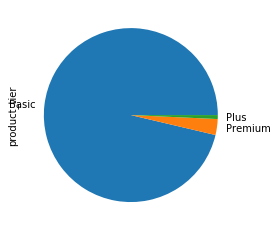

In [19]:
df.product_tier.value_counts().plot.pie()
plt.show()


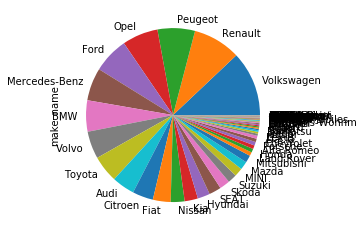

In [20]:
df.make_name.value_counts().plot.pie()
plt.show()


The first_zip_digit column doesn't seem to have any anomaly

In [21]:
df.first_zip_digit.value_counts().sort_values()

9     4174
8     6193
4     6758
6     7253
1     7704
2     9711
7    10994
5    12160
3    13342
Name: first_zip_digit, dtype: int64

Check if there is any unrealistic vehicle registration year

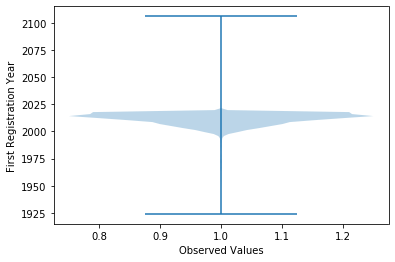

In [22]:
fig, ax = plt.subplots()

ax.violinplot(df["first_registration_year"])

ax.set_ylabel('First Registration Year')

ax.set_xlabel('Observed Values')
plt.show()


In [23]:
if df[(df["first_registration_year"]>2020)].empty:
    print("\nNo vehicle found whose registration date is in the future")
else:
    print("\nCheck your data, some values of the column -first_registration_year- are above realistic limits")

#change value to correct figure
df.at[358877131, "first_registration_year"]=2016


Check your data, some values of the column -first_registration_year- are above realistic limits


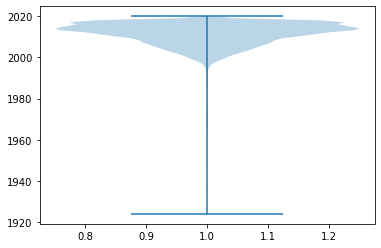

In [24]:
fig, ax = plt.subplots()

ax.violinplot(df["first_registration_year"])
plt.show()


The same applies for the created dates. 
First the year has to be <= 2020, the month betweeen 1 & 12 and the dates between 1 and 31. 
It is true that some months don't have 31 days, or the february case, we could develop a more specific function to tackle this, but we will continue like it is due to time constraints

In [25]:
if not df[df.created_date.dt.year<1998].empty: 
    print("\nCreation date year is <1998")
if not df[df.created_date.dt.year>2020].empty:
    print("\nCreation date year is <1998")

    
if not df[df.deleted_date.dt.year<1998].empty: 
    print("\nCreation date year is <1998")
if not df[df.deleted_date.dt.year>2020].empty:
    print("\nCreation date year is <1998")


As well, just by quickly looking at the data, the stock_days do not match with the difference with the new switched order (and of course neither with the previous order). Plus some stock days are negative, when they should be positive.

Due to the high inconsisntency of the data we will swap the columns for those rows where created_date<deleted_date and create again from scratch the stock_days column

In [26]:
df[df.stock_days<0].head()



product_tier   make_name  price  first_zip_digit  \
article_id                                                    
359768765         Basic        MINI  19950                7   
362809203         Basic      Toyota  13495                3   
347248705         Basic  Volkswagen  13925                7   
357831511         Basic     Bentley  69950                1   
348703289         Basic   Chevrolet  18900                7   

            first_registration_year created_date deleted_date  search_views  \
article_id                                                                    
359768765                      2011   2018-04-10   2018-04-10           4.0   
362809203                      2014   2018-08-11   2018-09-11          85.0   
347248705                      2013   2018-04-07   2018-04-07          29.0   
357831511                      2007   2018-12-09   2018-12-09          47.0   
348703289                      1966   2018-12-07   2018-12-07         100.0   

            detail_views  stock_days       ctr  
article_id                                      
359768765            1.0          -1  0.250000  
362809203            0.0          -1  0.000000  
347248705            5.0          -1  0.172414  
357831511            0.0          -1  0.000000  
348703289           19.0          -1  0.190000

Next, the created_date needs to be equal or inferior to the deleted_date. Which share of our data does not comply with this ?

In [27]:
df_wrong_dates = df[df.created_date>=df.deleted_date]

print(len(df_wrong_dates)/len(df))

0.3128919771615425


That is quite a lot. One reason of such inconsistency could be that the order of the day & months is not correct. However some days that could be potentially months are >12.

It could be that the order between created and deleted date is the reversed. 


In [28]:
df_wrong_dates["new_created_date"] = df_wrong_dates["deleted_date"]

df_wrong_dates["new_deleted_date"] = df_wrong_dates["created_date"]

df_wrong_dates = df_wrong_dates.drop(columns=["created_date","deleted_date"])

df_wrong_dates = df_wrong_dates.rename(columns={"new_created_date": "created_date", "new_deleted_date": "deleted_date"})

df_corrected_dates= df_wrong_dates[["product_tier", "make_name", "price","first_zip_digit","first_registration_year","created_date", "deleted_date","search_views","detail_views","stock_days","ctr"]]

df.update(df_corrected_dates)



C:\Users\angel.rey-pedrero\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\angel.rey-pedrero\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We correct the stock dates with the new swaped date columns

In [29]:
df["stock_days"]  = df.deleted_date - df.created_date


#Check if we have negative days
if not df[df["stock_days"]<pd.Timedelta(0,unit='d')].empty:
    print("\nThere are still some negative days, please check")

Let's have a look now at the price column. After researching in the website, we will assume any price below 50€ is an article that was not complete, in other words, the owner did not finish preparing the article, or he stopped selling the product but just removed the information and did not delete he listing. In fact most of the articles with very low prices do not have pictures nor description. 

As well prices that are very rare, such as extremely high prices need to be considered of removal, since they could be outliers that would bias our analysis.

For that we will use first a simple filter to remove manually those observations below price = 50 and the z-score treshold which removes outliers based on how far away is the observation in terms of the number of standard deviations. But let's see what are the implications of this methodology



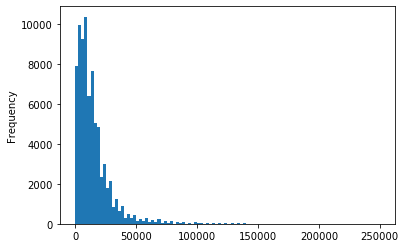

In [30]:
df = df[df.price>50]

#check histogram before the outlier removal
df.price.plot.hist(bins=100)
plt.show()


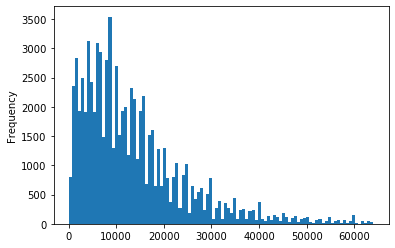

In [31]:
import numpy as np
from scipy import stats


def remove_outliers(df, column, z_score_threshold=4 ):

    if column == "stock_days":
        
        subdata =df[column].dt.days
        
    else:
        subdata =df[column]

    z = np.abs(stats.zscore(subdata))
    outliers= np.where(z > z_score_threshold)
    subdata = subdata[(z < z_score_threshold)]
    df = df.drop(df.index[outliers])

    return df

new_df = remove_outliers(df, "price", 3)

#check histogram after outlier removal
new_df.price.plot.hist(bins=100)
plt.show()


In [32]:
print("We removed "+str((1-len(new_df)/len(df))*100)+"% of the data")

We removed 1.867654573326516% of the data


Looks the price distribution looks like a Possion distribution. 

But before continuing let's check how our main variable (product_tier) is affected by this removal

In [33]:
1 - new_df.product_tier.value_counts() /df.product_tier.value_counts()

Basic      0.018622
Premium    0.022049
Plus       0.012259
Name: product_tier, dtype: float64

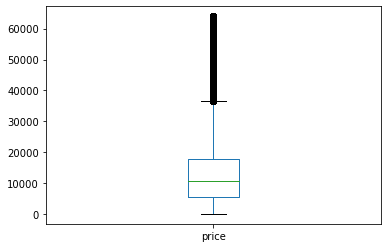

In [34]:
new_df.price.plot.box()
plt.show()


With this approach we removed a significant amount of outliers. But what if those outliers are the ones that tell us that "On Top Products" are actually the ones wich higher prices ? This could be an useful insight to consider.
So we will not use the z-score approach for the price column


How does the stock_days variable look like ?

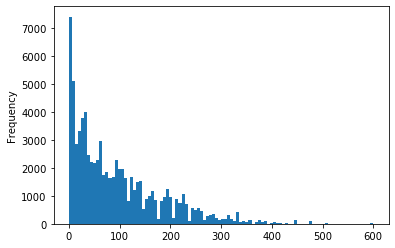

In [35]:
df.stock_days.dt.days.plot.hist(bins=100)
plt.show()


Looks like we have a very rare observation in search_views

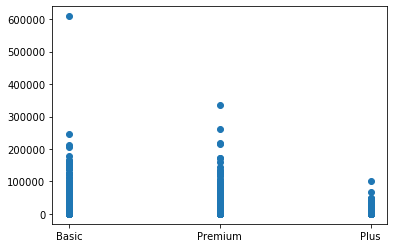

In [36]:
plt.scatter(df.product_tier, df.search_views)
plt.show()


We will remove that obervation by filtering:

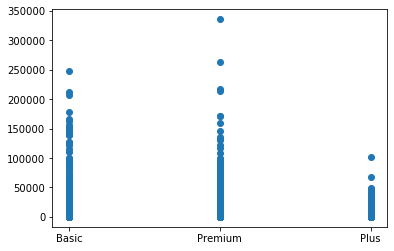

In [37]:
df = df[df["search_views"]<500000]

plt.scatter(df.product_tier, df.search_views)
plt.show()


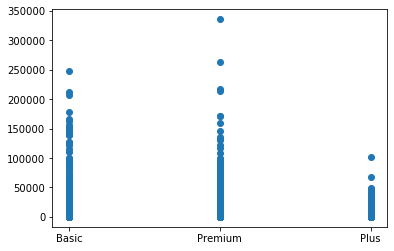

In [38]:
plt.scatter(df.product_tier, df.search_views)
plt.show()


# 2 Descriptive Analysis

We already plotted some graphs in the previous sections, mainly to check if there were anomalies that were easy to spot.
Now we will as well plot but with the objective to visualize data relationships


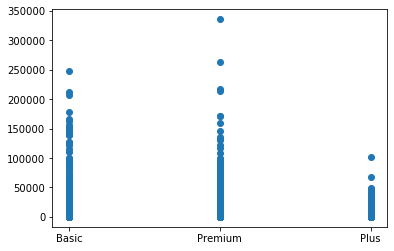

In [39]:
plt.scatter(df.product_tier, df.search_views)
plt.show()


For a matter of visualization let's limit our range of values by excluding the most extreme outliers

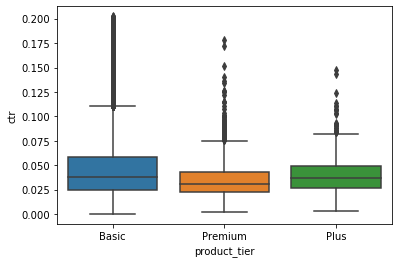

In [40]:
df_normal_search = remove_outliers(df, "search_views", 6)
df_normal_search_and_ctr = remove_outliers(df_normal_search, "ctr", 4)
df_normal_search_details_and_ctr = remove_outliers(df_normal_search_and_ctr, "detail_views", 5)
df_no_outliers = remove_outliers(df_normal_search_details_and_ctr, "stock_days", 4)

sns.boxplot(x=df_no_outliers["product_tier"], y=df_no_outliers["ctr"])
plt.show()


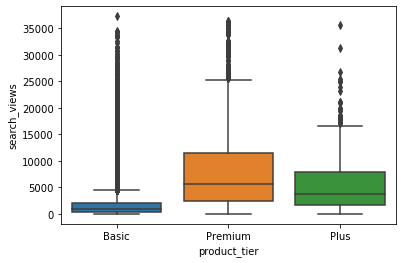

In [41]:
sns.boxplot(x=df_no_outliers["product_tier"], y=df_no_outliers["search_views"])
plt.show()


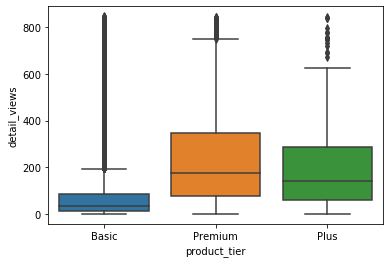

In [42]:
sns.boxplot(x=df_no_outliers["product_tier"], y=df_no_outliers["detail_views"])
plt.show()


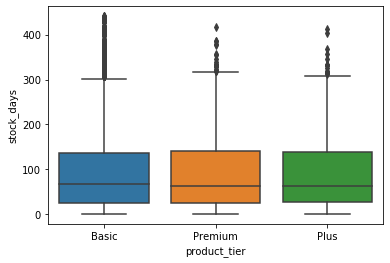

In [43]:
sns.boxplot(x=df_no_outliers["product_tier"], y=df_no_outliers["stock_days"].dt.days)
plt.show()


Transform stock_days to int for calculation purposes

In [44]:
df_no_outliers["stock_days"] = df_no_outliers["stock_days"].dt.days 

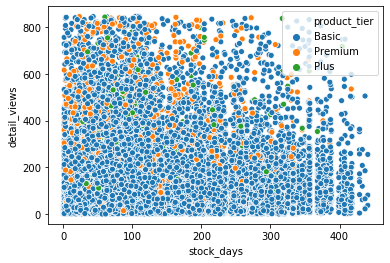

In [45]:
sns.scatterplot( x= "stock_days", y = "detail_views", hue ="product_tier", data=df_no_outliers)
plt.show()


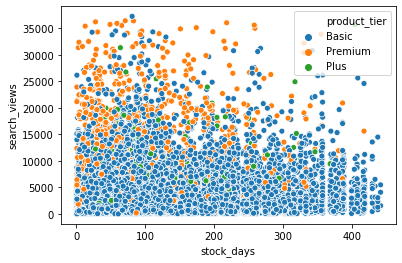

In [46]:
sns.scatterplot( x= "stock_days", y = "search_views", hue ="product_tier", data=df_no_outliers)
plt.show()


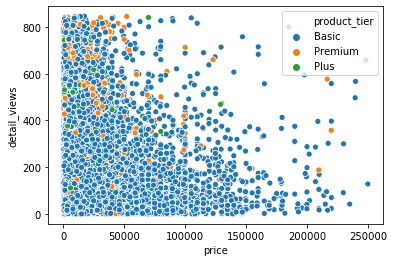

In [47]:
sns.scatterplot( x= "price", y = "detail_views", hue ="product_tier", data=df_no_outliers)
plt.show()


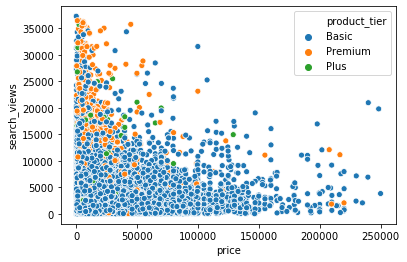

''

In [60]:
sns.scatterplot( x= "price", y = "search_views", hue ="product_tier", data=df_no_outliers)
plt.show()
''

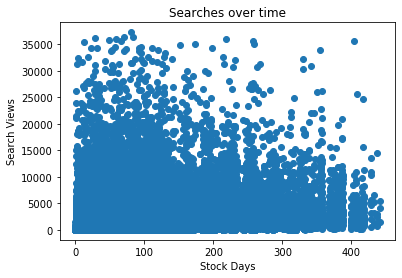

In [49]:
plt.scatter( df_no_outliers.stock_days, df_no_outliers.search_views)
plt.xlabel("Stock Days")
plt.ylabel("Search Views")
plt.title("Searches over time")
plt.show()


The correlation matrix will help us understand the relationships between our variables.



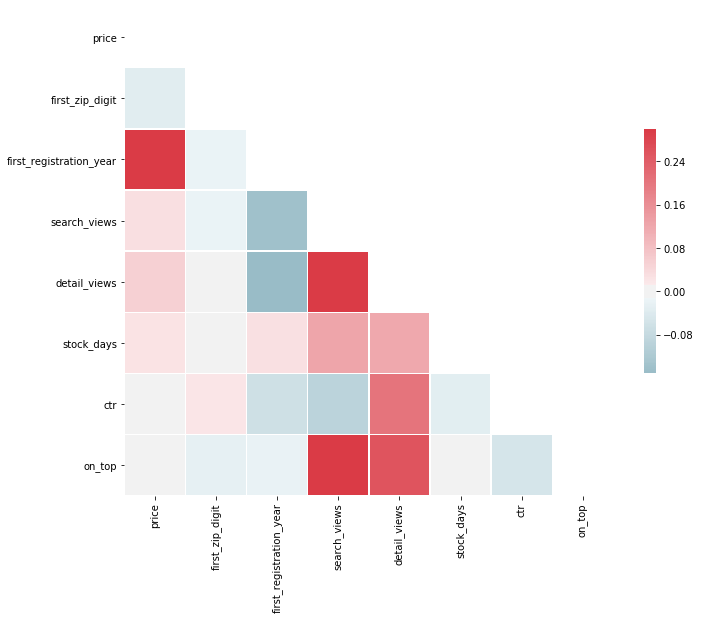

In [50]:
# Compute the correlation matrix

df_no_outliers["on_top"] = df_no_outliers["product_tier"].apply(lambda x: 1 if "Basic" not in x else 0)

corr = df_no_outliers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


Summarizing all data in tables for detailed analyisis:

In [51]:


summary = df_no_outliers.groupby("product_tier").sum().drop(columns=["first_zip_digit","first_registration_year","ctr","on_top"])

summary["count"] = df_no_outliers.groupby("product_tier").count()["make_name"]

summary["price_x_article"] = round(summary["price"]/ summary["count"],2)

summary["search_Views_x_article"] = round(summary["search_views"]/ summary["count"],0)

summary["detail_Views_x_article"] = round(summary["detail_views"]/ summary["count"],0)

summary["stock_days_x_article"] = round(summary["stock_days"]/ summary["count"],2)



summary["ctr"] = round(summary["detail_views"]/ summary["search_views"],4)
summary = summary.drop(columns=[ "price", "stock_days"])
summary.columns=[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art.", "Stock Days x Art.", "CTR"]
summary_clean = summary.rename_axis("Product Tier")
summary_clean[[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art."]] = summary_clean[[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art."]].astype(int)

display(summary_clean)

Search Views  Detail Views   Size  Price x Art.  \
Product Tier                                                    
Basic            124633590       5261896  74031         15078   
Plus               2961997        109102    541         12855   
Premium           16323667        475150   1995         14572   

              Search Views x Art.  Detail Views x Art.  Stock Days x Art.  \
Product Tier                                                                
Basic                        1684                   71              92.35   
Plus                         5475                  202              92.59   
Premium                      8182                  238              90.24   

                 CTR  
Product Tier          
Basic         0.0422  
Plus          0.0368  
Premium       0.0291

We can see in the table below very interesting results:

1. Due to the distribution of the sample (we have much more Basic obervations), Basic dominates on search_views. 
This is not ideal, since the difference in the amount of observations per group is very high

2. We cannot make any conclusion with Price with this information

3. Per article, Premium and Plus seem to have significant superior more views than Basic

4. Stock days analysis is not that clear with a simple descriptive analysis

5. Ctr is higher for Basic

With this simple information we can say that On Top Products do have an attractive result in terms of visibility and interaction.

Since data is highly unbalanced in favor of Basic, let's group both Premium and Plus together (1 --> ontop), even though we will still have a very unbalanced dataset

In [52]:
df["stock_days"] = df["stock_days"].dt.days 

df["on_top"] = df["product_tier"].apply(lambda x: 1 if "Basic" not in x else 0)

summary2 = df.groupby("on_top").sum().drop(columns=["first_zip_digit","first_registration_year","ctr",])

summary2["count"] = df.groupby("on_top").count()["make_name"]

summary2["price_x_article"] = round(summary2["price"]/ summary2["count"],2)

summary2["search_Views_x_article"] = round(summary2["search_views"]/ summary2["count"],0)

summary2["detail_Views_x_article"] = round(summary2["detail_views"]/ summary2["count"],0)

summary2["stock_days_x_article"] = round(summary2["stock_days"]/ summary2["count"],2)



summary2["ctr"] = round(summary2["detail_views"]/ summary2["search_views"],4)



summary2["ctr"] = round(summary2["detail_views"]/ summary2["search_views"],4)
summary2 = summary2.drop(columns=[  "price", "stock_days"])
summary2.columns=[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art.", "Stock Days x Art.", "CTR"]
summary2 = summary2.rename_axis("Product Tier")
summary2[[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art."]] = summary2[[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art."]].astype(int)



display(summary2)


summary2.to_csv("descriptive_analysis_summary_by_OT.csv")

Search Views  Detail Views   Size  Price x Art.  \
Product Tier                                                    
0                143335211       6210712  75395         15102   
1                 34896145       1067763   2884         14288   

              Search Views x Art.  Detail Views x Art.  Stock Days x Art.  \
Product Tier                                                                
0                            1901                   82              93.88   
1                           12100                  370              95.01   

                 CTR  
Product Tier          
0             0.0433  
1             0.0306

We have similar results as before. Despite on_top products have a lower CTR, they still provide more detail_views per article

Check quickly how it would like with the dataframe without outlier removal

In [53]:
summary_with_outliers = df.groupby("product_tier").sum().drop(columns=["first_zip_digit","first_registration_year","ctr","on_top"])

summary_with_outliers["count"] = df.groupby("product_tier").count()["make_name"]

summary_with_outliers["price_x_article"] = round(summary_with_outliers["price"]/ summary_with_outliers["count"],2)

summary_with_outliers["search_Views_x_article"] = round(summary_with_outliers["search_views"]/ summary_with_outliers["count"],0)

summary_with_outliers["detail_Views_x_article"] = round(summary_with_outliers["detail_views"]/ summary_with_outliers["count"],0)

summary_with_outliers["stock_days_x_article"] = round(summary_with_outliers["stock_days"]/ summary_with_outliers["count"],2)



summary_with_outliers["ctr"] = round(summary_with_outliers["detail_views"]/ summary_with_outliers["search_views"],4)
summary_with_outliers = summary_with_outliers.drop(columns=[ "price", "stock_days"])

summary_with_outliers.columns=["Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art.", "Stock Days x Art.", "CTR"]

summary_with_outliers_clean = summary_with_outliers.rename_axis("Product Tier")

summary_with_outliers_clean[[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art."]] = summary_with_outliers_clean[[  "Search Views", "Detail Views", "Size", "Price x Art.", "Search Views x Art.", "Detail Views x Art."]].astype(int)

display(summary_with_outliers)

summary_with_outliers_clean.to_csv("descriptive_analysis_summary_by_PT.csv")

summary_diff_with_vs_without_outliers = 1- (summary_with_outliers / summary_clean)

display(summary_diff_with_vs_without_outliers)
summary_diff_with_vs_without_outliers.to_csv("descriptive_analysis_summary_diff.csv")

Search Views  Detail Views   Size  Price x Art.  \
product_tier                                                    
Basic          143335211.0     6210712.0  75395      15102.42   
Plus             3856799.0      142648.0    571      12828.76   
Premium         31039346.0      925115.0   2313      14648.92   

              Search Views x Art.  Detail Views x Art.  Stock Days x Art.  \
product_tier                                                                
Basic                      1901.0                 82.0              93.88   
Plus                       6754.0                250.0              96.29   
Premium                   13420.0                400.0              94.69   

                 CTR  
product_tier          
Basic         0.0433  
Plus          0.0370  
Premium       0.0298

Search Views  Detail Views      Size  Price x Art.  \
product_tier                                                       
Basic            -0.150053     -0.180318 -0.018425     -0.001620   
Plus             -0.302094     -0.307474 -0.055453      0.002041   
Premium          -0.901493     -0.946996 -0.159398     -0.005279   

              Search Views x Art.  Detail Views x Art.  Stock Days x Art.  \
product_tier                                                                
Basic                   -0.128860            -0.154930          -0.016567   
Plus                    -0.233607            -0.237624          -0.039961   
Premium                 -0.640186            -0.680672          -0.049313   

                   CTR  
product_tier            
Basic        -0.026066  
Plus         -0.005435  
Premium      -0.024055

After outlier removal the premium category is losing strongly in terms of traffic. But not in terms of price not CTR

# 3 Regression Analysis

First let's group the 3 product tiers in two groups. OnTop and not-OnTop

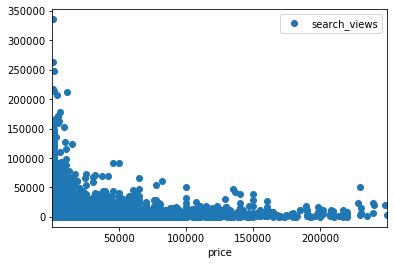

In [54]:
df = df.reset_index()
#encode our dummy variable (we could also have used the pandas.get_dummies method)

df_num = df.drop(columns=["product_tier","make_name", "ctr","first_zip_digit", "first_registration_year", "created_date", "deleted_date","article_id"])

df_num["ctr"] = df_num["detail_views"] / df_num["search_views"]

df_num = df_num.fillna(0)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

df_num.plot(x="price",y="search_views" ,style="o")
plt.show()


df_num_sc = df_num.copy() 

scaler = MinMaxScaler()


#let's scale our data to avoid that high magnitude variables affect our estimates
df_num_sc[df_num_sc.columns] = scaler.fit_transform(df_num_sc[["price", "search_views", "detail_views", "stock_days","on_top" ,"ctr"]])


## Linear Regression (OLS)

Despite it doesn't really make sense to use this model with our data, let's have a look:

Train dataset size: (54795, 3) (54795,)
Test dataset size:(23484, 3) (23484,)


Test  Predicted
64468  0.000790   0.004611
24009  0.004955   0.005027
20501  0.000790   0.007942
2653   0.003447   0.004892
48590  0.000574   0.005739

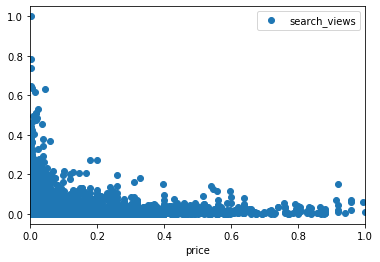

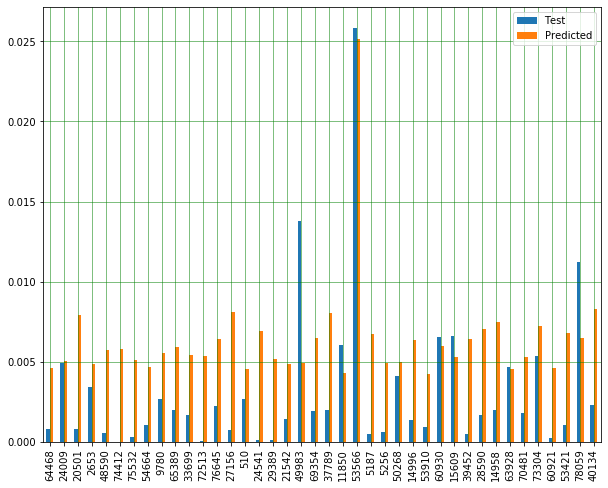

Coefficients
stock_days      0.009536
on_top          0.020735
price           0.007090

R2: 0.07181079318159367
Intercept:0.00400606415938352
Mean Absolute Error: 0.006358756971850983
Mean Squared Error: 0.00022864384278388773
Root Mean Squared Error: 0.01512097360568716


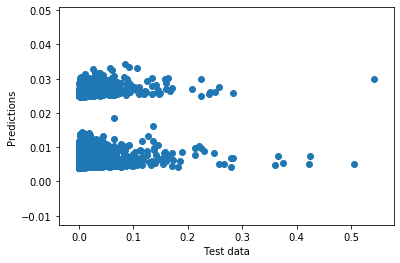

In [55]:
lm = linear_model.LinearRegression()
independent_variables = [ "stock_days", "on_top", "price"]
dependent_variable = "detail_views"


#Check if distribution changes after scaling
df_num_sc.plot(x="price",y="search_views" ,style="o")

X_train, X_test, y_train, y_test = train_test_split(df_num_sc[independent_variables], df_num_sc[dependent_variable], test_size=0.3)

print("Train dataset size: "+str(X_train.shape) +" "+str(y_train.shape))

print("Test dataset size:" +str(X_test.shape)+" "+str(y_test.shape))

model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


testVspred = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
display(testVspred.head())

testVspred.head(40).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


plt.scatter( y_test, y_pred)
plt.xlabel("Test data")
plt.ylabel("Predictions")
#plt.plot(X_test, y_pred, color="red", linewidth=1)

coef = pd.DataFrame(lm.coef_, independent_variables, columns=["Coefficients"] )
display(coef)
# Percentage of explained variance of the predictions
print("R2: "+str(r2_score(y_test, y_pred)))
print("Intercept:" +str(lm.intercept_))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Solving imbalanced dat with oversampling

In [63]:
count_basic, count_on_top = df_num_sc['on_top'].value_counts()

df_on_top_over = df_num_sc[df_num_sc.on_top==1].sample(count_basic,replace=True)

df_over = pd.concat([df_on_top_over, df_num_sc[df_num_sc.on_top==0]])


Train dataset size: (105553, 3) (105553,)
Test dataset size:(45237, 3) (45237,)


Test  Predicted
27168  0.003447   0.011331
72040  0.028436   0.024236
2182   0.011130   0.003446
7540   0.032314   0.025218
67332  0.003375   0.003115

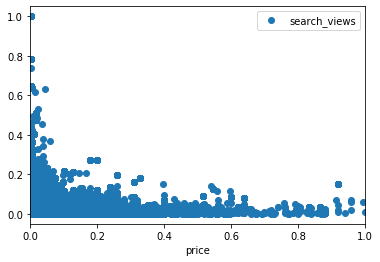

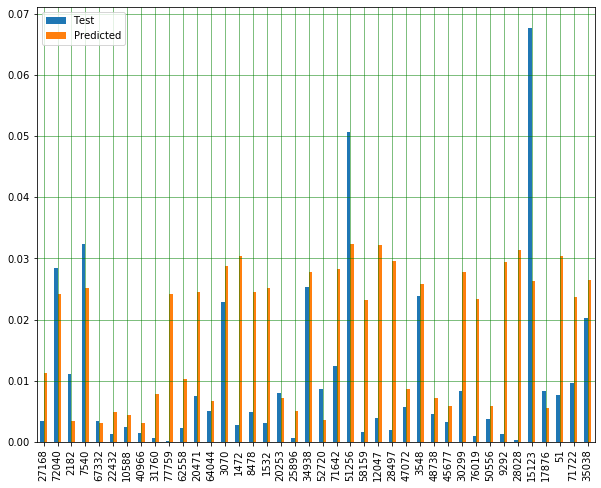

Coefficients
stock_days      0.020501
on_top          0.020826
price           0.006381

R2: 0.1037152238545056
Intercept:0.002302946463422044
Mean Absolute Error: 0.014206587593152074
Mean Squared Error: 0.0009964415023273078
Root Mean Squared Error: 0.03156646166942548


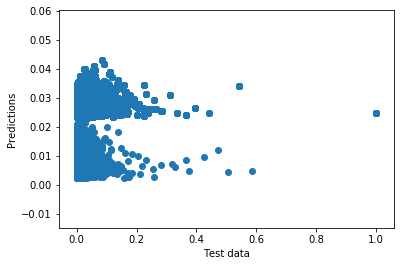

In [64]:
lm = linear_model.LinearRegression()
independent_variables = [ "stock_days", "on_top", "price"]
dependent_variable = "detail_views"


#Check if distribution changes after scaling
df_over.plot(x="price",y="search_views" ,style="o")

X_train, X_test, y_train, y_test = train_test_split(df_over[independent_variables], df_over[dependent_variable], test_size=0.3)

print("Train dataset size: "+str(X_train.shape) +" "+str(y_train.shape))

print("Test dataset size:" +str(X_test.shape)+" "+str(y_test.shape))

model = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


testVspred = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
display(testVspred.head())

testVspred.head(40).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter( y_test, y_pred)
plt.xlabel("Test data")
plt.ylabel("Predictions")
#plt.plot(X_test, y_pred, color="red", linewidth=1)

coef = pd.DataFrame(lm.coef_, independent_variables, columns=["Coefficients"] )
display(coef)
# Percentage of explained variance of the predictions
print("R2: "+str(r2_score(y_test, y_pred)))
print("Intercept:" +str(lm.intercept_))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Binary Logistic Regression

OLS is not ideal for discrete data. Another solutions is to use a Logistic Regression by categorizing the continuous dependent variable into 2 categories or more. 

In this project for simplicity we will just classify them on 2

In [79]:
df_over_cat = df_over.copy()

df_over_cat["detail_cat"] = pd.cut(df_over_cat.detail_views, bins = [-1,0.0008,2  ], labels= ["low_detail_views","high_detail_views" ])
df_over_cat.detail_cat.value_counts()

#To do a multinomial regression we could use the following below
# df_over_cat["detail_cat"] = pd.cut(df_over_cat.detail_views, bins = [-1,0.003,0.012,2  ], labels= ["low_detail_views","moderate_detail_views","high_detail_views" ])
# df_over_cat.detail_cat.value_counts()

high_detail_views    131368
low_detail_views      19422
Name: detail_cat, dtype: int64

Train dataset size: (105553, 1) (105553,)
Test dataset size:(45237, 1) (45237,)


C:\Users\angel.rey-pedrero\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score :0.8728474478855804


Odds Ratio
on_top    0.069155

Intercept:[-1.1658871]


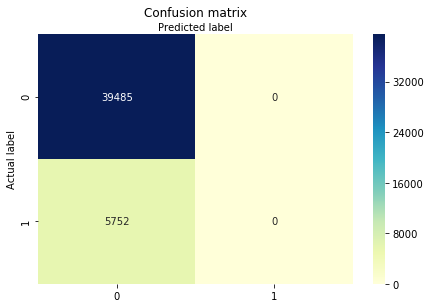

In [80]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
independent_variables = [  "on_top"]
dependent_variable = "detail_cat"


X_train, X_test, y_train, y_test = train_test_split(df_over_cat[independent_variables], df_over_cat[dependent_variable], test_size=0.3)

print("Train dataset size: "+str(X_train.shape) +" "+str(y_train.shape))

print("Test dataset size:" +str(X_test.shape)+" "+str(y_test.shape))

model = logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)


from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

score = logit.score(X_test, y_test)
print("Score :"+str(score))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

import math


odds_ratio = []
for i in logit.coef_.tolist()[0]:
    odds_ratio.append(math.exp(i))

coef = pd.DataFrame(odds_ratio, independent_variables, columns=["Odds Ratio"] )

display(coef)

#print("R2: "+str(r2_score(y_test, y_pred)))
print("Intercept:" +str(logit.intercept_))



In [81]:
logit.coef_

array([[-2.67140732]])